## 範例重點
* 學會從 Keras 內建函式取得資料
* 能夠建立簡易的深度學習模型
* 觀察並了解 Overfit 現象

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = "無"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

# optimizer = keras.optimizers.Adam(lr=0.001)
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 111us/step - loss: 2.2755 - acc: 0.1680 - val_loss: 2.2345 - val_acc: 0.2038
Epoch 2/500
50000/50000 [==============================] - 5s 104us/step - loss: 2.2061 - acc: 0.2270 - val_loss: 2.1787 - val_acc: 0.2554
Epoch 3/500
50000/50000 [==============================] - 5s 105us/step - loss: 2.1524 - acc: 0.2602 - val_loss: 2.1278 - val_acc: 0.2692
Epoch 4/500
50000/50000 [==============================] - 5s 104us/step - loss: 2.1041 - acc: 0.2753 - val_loss: 2.0823 - val_acc: 0.2822
Epoch 5/500
50000/50000 [==============================] - 5s 108us/step - loss: 2.0619 - acc: 0.2883 - val_loss: 2.0433 - val_acc: 0.2942
Epoch 6/500
50000/50000 [==============================] - 6s 114us/step - loss: 2.0265 - acc: 0.2977 - val_loss: 2.0112 - val_acc: 0.3067
Epoch 7/500
50000/50000 [==============================] - 6s 111us/

50000/50000 [==============================] - 5s 103us/step - loss: 1.6600 - acc: 0.4212 - val_loss: 1.6661 - val_acc: 0.4126
Epoch 58/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.6571 - acc: 0.4225 - val_loss: 1.6632 - val_acc: 0.4164
Epoch 59/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.6538 - acc: 0.4240 - val_loss: 1.6611 - val_acc: 0.4136
Epoch 60/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.6511 - acc: 0.4241 - val_loss: 1.6580 - val_acc: 0.4152
Epoch 61/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.6483 - acc: 0.4249 - val_loss: 1.6592 - val_acc: 0.4160
Epoch 62/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.6453 - acc: 0.4263 - val_loss: 1.6544 - val_acc: 0.4169
Epoch 63/500
50000/50000 [==============================] - 5s 107us/step - loss: 1.6428 - acc: 0.4279 - val_loss: 1.6518 - val_acc: 0.4223
Epoch 64/500
50000/50000 [=======

50000/50000 [==============================] - 5s 101us/step - loss: 1.5267 - acc: 0.4659 - val_loss: 1.5533 - val_acc: 0.4545
Epoch 116/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.5250 - acc: 0.4668 - val_loss: 1.5526 - val_acc: 0.4577
Epoch 117/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.5228 - acc: 0.4677 - val_loss: 1.5526 - val_acc: 0.4563
Epoch 118/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.5215 - acc: 0.4686 - val_loss: 1.5513 - val_acc: 0.4519
Epoch 119/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.5198 - acc: 0.4682 - val_loss: 1.5491 - val_acc: 0.4536
Epoch 120/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.5174 - acc: 0.4693 - val_loss: 1.5503 - val_acc: 0.4525
Epoch 121/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.5155 - acc: 0.4702 - val_loss: 1.5443 - val_acc: 0.4572
Epoch 122/500
50000/50000 [

50000/50000 [==============================] - 5s 105us/step - loss: 1.4332 - acc: 0.4986 - val_loss: 1.4923 - val_acc: 0.4704
Epoch 174/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.4314 - acc: 0.4984 - val_loss: 1.4832 - val_acc: 0.4735
Epoch 175/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.4299 - acc: 0.4991 - val_loss: 1.4825 - val_acc: 0.4753
Epoch 176/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.4285 - acc: 0.5010 - val_loss: 1.4824 - val_acc: 0.4742
Epoch 177/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.4274 - acc: 0.5004 - val_loss: 1.4859 - val_acc: 0.4724
Epoch 178/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.4256 - acc: 0.5008 - val_loss: 1.4841 - val_acc: 0.4745
Epoch 179/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.4240 - acc: 0.5033 - val_loss: 1.4838 - val_acc: 0.4755
Epoch 180/500
50000/50000 [

50000/50000 [==============================] - 5s 102us/step - loss: 1.3509 - acc: 0.5276 - val_loss: 1.4313 - val_acc: 0.4928
Epoch 232/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.3506 - acc: 0.5283 - val_loss: 1.4334 - val_acc: 0.4920
Epoch 233/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.3489 - acc: 0.5282 - val_loss: 1.4341 - val_acc: 0.4886
Epoch 234/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.3476 - acc: 0.5284 - val_loss: 1.4315 - val_acc: 0.4932
Epoch 235/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.3460 - acc: 0.5298 - val_loss: 1.4328 - val_acc: 0.4899
Epoch 236/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.3454 - acc: 0.5301 - val_loss: 1.4286 - val_acc: 0.4910
Epoch 237/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.3437 - acc: 0.5297 - val_loss: 1.4462 - val_acc: 0.4909
Epoch 238/500
50000/50000 [

50000/50000 [==============================] - 5s 102us/step - loss: 1.2793 - acc: 0.5514 - val_loss: 1.3961 - val_acc: 0.5074
Epoch 290/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.2792 - acc: 0.5519 - val_loss: 1.4011 - val_acc: 0.5047
Epoch 291/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.2770 - acc: 0.5530 - val_loss: 1.3889 - val_acc: 0.5054
Epoch 292/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.2751 - acc: 0.5543 - val_loss: 1.3921 - val_acc: 0.5044
Epoch 293/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.2742 - acc: 0.5543 - val_loss: 1.3902 - val_acc: 0.5042
Epoch 294/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.2740 - acc: 0.5539 - val_loss: 1.4066 - val_acc: 0.4960
Epoch 295/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.2729 - acc: 0.5546 - val_loss: 1.4160 - val_acc: 0.4976
Epoch 296/500
50000/50000 [

50000/50000 [==============================] - 5s 103us/step - loss: 1.2148 - acc: 0.5749 - val_loss: 1.3735 - val_acc: 0.5146
Epoch 348/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.2128 - acc: 0.5764 - val_loss: 1.3622 - val_acc: 0.5185
Epoch 349/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.2125 - acc: 0.5774 - val_loss: 1.3690 - val_acc: 0.5194
Epoch 350/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.2114 - acc: 0.5769 - val_loss: 1.3862 - val_acc: 0.5084
Epoch 351/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.2096 - acc: 0.5783 - val_loss: 1.4063 - val_acc: 0.5014
Epoch 352/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.2086 - acc: 0.5784 - val_loss: 1.3877 - val_acc: 0.5099
Epoch 353/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.2080 - acc: 0.5778 - val_loss: 1.3806 - val_acc: 0.5120
Epoch 354/500
50000/50000 [

50000/50000 [==============================] - 5s 101us/step - loss: 1.1527 - acc: 0.5976 - val_loss: 1.3746 - val_acc: 0.5183
Epoch 406/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.1507 - acc: 0.5993 - val_loss: 1.3660 - val_acc: 0.5165
Epoch 407/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.1505 - acc: 0.5988 - val_loss: 1.3782 - val_acc: 0.5152
Epoch 408/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.1500 - acc: 0.6001 - val_loss: 1.3615 - val_acc: 0.5213
Epoch 409/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.1498 - acc: 0.5997 - val_loss: 1.3987 - val_acc: 0.5070
Epoch 410/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.1480 - acc: 0.5993 - val_loss: 1.3653 - val_acc: 0.5227
Epoch 411/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.1483 - acc: 0.5984 - val_loss: 1.3857 - val_acc: 0.5098
Epoch 412/500
50000/50000 [

50000/50000 [==============================] - 5s 101us/step - loss: 1.0937 - acc: 0.6180 - val_loss: 1.3771 - val_acc: 0.5150
Epoch 464/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.0922 - acc: 0.6186 - val_loss: 1.3779 - val_acc: 0.5174
Epoch 465/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.0919 - acc: 0.6189 - val_loss: 1.3406 - val_acc: 0.5296
Epoch 466/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.0926 - acc: 0.6186 - val_loss: 1.3631 - val_acc: 0.5158
Epoch 467/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.0891 - acc: 0.6208 - val_loss: 1.3487 - val_acc: 0.5277
Epoch 468/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.0878 - acc: 0.6211 - val_loss: 1.3601 - val_acc: 0.5174
Epoch 469/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.0894 - acc: 0.6211 - val_loss: 1.4150 - val_acc: 0.5060
Epoch 470/500
50000/50000 [

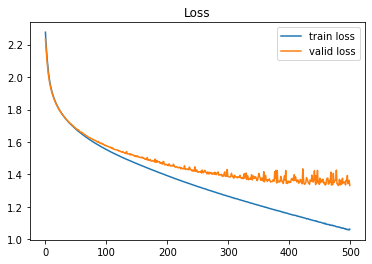

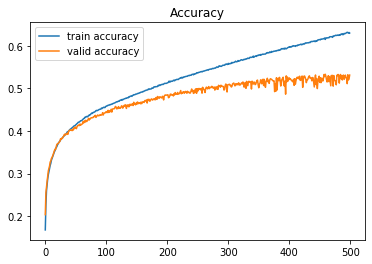

In [8]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 作業
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢